In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

#Настройки показа графиков в блокноте
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 8)

from sklearn import preprocessing
#%config InlineBackend.figure_format = 'svg' для большей четкости графиков
matplotlib.style.use('ggplot')
%matplotlib inline

#Стандартизация данных
from sklearn import preprocessing

#Построение диаграмм рассеивания
from pandas.plotting import scatter_matrix

#Графика для интерпретации моделей
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call

from sklearn.model_selection import train_test_split

#Деревья решений для задачи классификации
from sklearn.tree import DecisionTreeClassifier

#Калибровка деревьев решений
from sklearn.calibration import CalibratedClassifierCV

df = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')


In [5]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.00,38.00,26.00,35.00,35.00
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.28,7.92,53.10,8.05


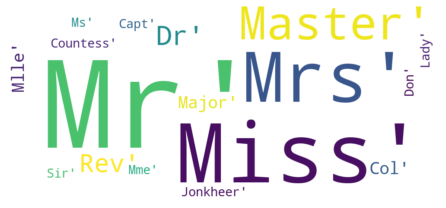

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Capt              1
the Countess      1
Lady              1
Sir               1
Don               1
Ms                1
Jonkheer          1
Mme               1
Name: Salutation, dtype: int64

In [7]:
df['Salutation'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
df.Salutation.nunique()
wc = WordCloud(width = 1000,height = 450,background_color = 'white').generate(str(df.Salutation.values))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

df.Salutation.value_counts()

In [ ]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [ ]:
df.head()

In [ ]:
#Меняем пропущенные значения на среднее значение по колонке 
df['Age'] = df['Age'].fillna(df['Age'].mean())